# Weather forecasting

The analysis aims to predict average temperature for Łódż by using data from [IMGW](https://imgw.pl). 

**Goal:** Evaluation of Random Forest Regressor against similar databases - albeit with different sample count and features.

**Steps:**

1. Naming columns
2. Data selection and data cleansing
3. Random Forest Regressor
4. Results
5. Conclusions

## Modules used:

In [166]:
import pandas as pd
import numpy as np
from translate import Translator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import datetime

## Database:

In [167]:
sd = pd.read_csv('./docsy/sd.csv', header=None, low_memory=False)

In [168]:
sd.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,351190465,ŁÓDŹ,1965.0,11.0,1.0,11.3,NaN,4.7,NaN,7.6,...,NaN,0.0,NaN,NaN,0.0,8.0,0.0,8.0,0.0,8.0
1,351190465,ŁÓDŹ,1965.0,11.0,2.0,12.3,NaN,7.1,NaN,9.5,...,NaN,0.0,NaN,NaN,0.0,8.0,0.0,8.0,0.0,8.0
2,351190465,ŁÓDŹ,1965.0,11.0,3.0,9.2,NaN,3.3,NaN,5.8,...,NaN,0.0,NaN,NaN,0.0,8.0,0.0,8.0,0.0,8.0
3,351190465,ŁÓDŹ,1965.0,11.0,4.0,7.0,NaN,0.8,NaN,3.4,...,NaN,0.0,NaN,NaN,0.0,8.0,0.0,8.0,0.0,8.0
4,351190465,ŁÓDŹ,1965.0,11.0,5.0,4.0,NaN,-1.4,NaN,1.4,...,NaN,0.0,NaN,NaN,0.0,8.0,0.0,8.0,0.0,8.0


In [169]:
sd.shape

(19420, 65)

In [170]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19420 entries, 0 to 19419
Data columns (total 65 columns):
0     19420 non-null object
1     19419 non-null object
2     19419 non-null float64
3     19419 non-null float64
4     19419 non-null float64
5     19419 non-null float64
6     1 non-null float64
7     19419 non-null float64
8     1 non-null float64
9     19419 non-null float64
10    1 non-null float64
11    19419 non-null float64
12    2 non-null float64
13    19419 non-null float64
14    7993 non-null float64
15    11439 non-null object
16    19419 non-null float64
17    16301 non-null float64
18    19419 non-null float64
19    18417 non-null float64
20    19419 non-null float64
21    4872 non-null float64
22    19419 non-null float64
23    10423 non-null float64
24    19419 non-null float64
25    16400 non-null float64
26    19419 non-null float64
27    18553 non-null float64
28    19419 non-null float64
29    19237 non-null float64
30    19419 non-null float64
31    16624 n

## 1. Naming columns

Since the headers are being store in the separate file in IMGW directory, I have downloaded the file in txt format in order to translate the names and assign them to columns. 

In [171]:
sdNames = pd.read_fwf('./docsy/sd_names.txt', header=None, squeeze='True')
sdNames.head()

0    Kod stacji                                    ...
1    Nazwa stacji                                  ...
2    Rok                                           ...
3    Miesiąc                                       ...
4    Dzień                                         ...
Name: 0, dtype: object

The original names contain multiple whitespaces and digits - splitting the string and extracting the part before the occurence of 3 or more whitespaces.

In [172]:
sdNames = sdNames.str.split('[ ]{3,}').str[0]
sdNames.head(10)

0                            Kod stacji
1                          Nazwa stacji
2                                   Rok
3                               Miesiąc
4                                 Dzień
5    Maksymalna temperatura dobowa [°C]
6                   Status pomiaru TMAX
7     Minimalna temperatura dobowa [°C]
8                   Status pomiaru TMIN
9       Średnia temperatura dobowa [°C]
Name: 0, dtype: object

Using translator module, names can be easily translated to english. Chosen columns will be renamed to be more "pythonish" further in the code, this translation is conducted for convenience only.

Looping through the names and assigning them to an array:

In [173]:
translator= Translator(from_lang='pl', to_lang='en')

sdNamesTrans = []

for i in range(0,65):
    sdNames[i] = translator.translate(sdNames[i])
    sdNamesTrans.append(sdNames[i])

In [174]:
sd.columns = sdNamesTrans

## 2. Data selection and data cleansing

The translation looks ok. 

After quick investiagation it can be concluded that some of the series contain very few values - they will not have any use in the analaysis.

In [175]:
sd.count().head(20)

Station code                               19420
Station name                               19419
Year                                       19419
Month                                      19419
Day                                        19419
Maximum daily temperature [° C]            19419
TMAX measurement status                        1
Minimal daily temperature [° C]            19419
TMIN measurement status                        1
the average daily temperature              19419
STD measurement status                         1
Minimum temperature at the ground [° C]    19419
TMNG measurement status                        2
Daily precipitation sum [mm]               19419
SMDB measurement status                     7993
Type of precipitation [S / W /]            11439
Snow height [cm]                           19419
PKSN measurement status                    16301
Water equivalent of snow [mm / cm]         19419
RWSN measurement status                    18417
dtype: int64

In [176]:
for column in sd:
    if(sd[column].count() < 16000):
        sd.drop(sd[column].name, axis=1, inplace=True)

Since the analysis aims to establish what factors influence the average daily temperature, I am going to generate a heatmap to represent the features that impact this label the most.

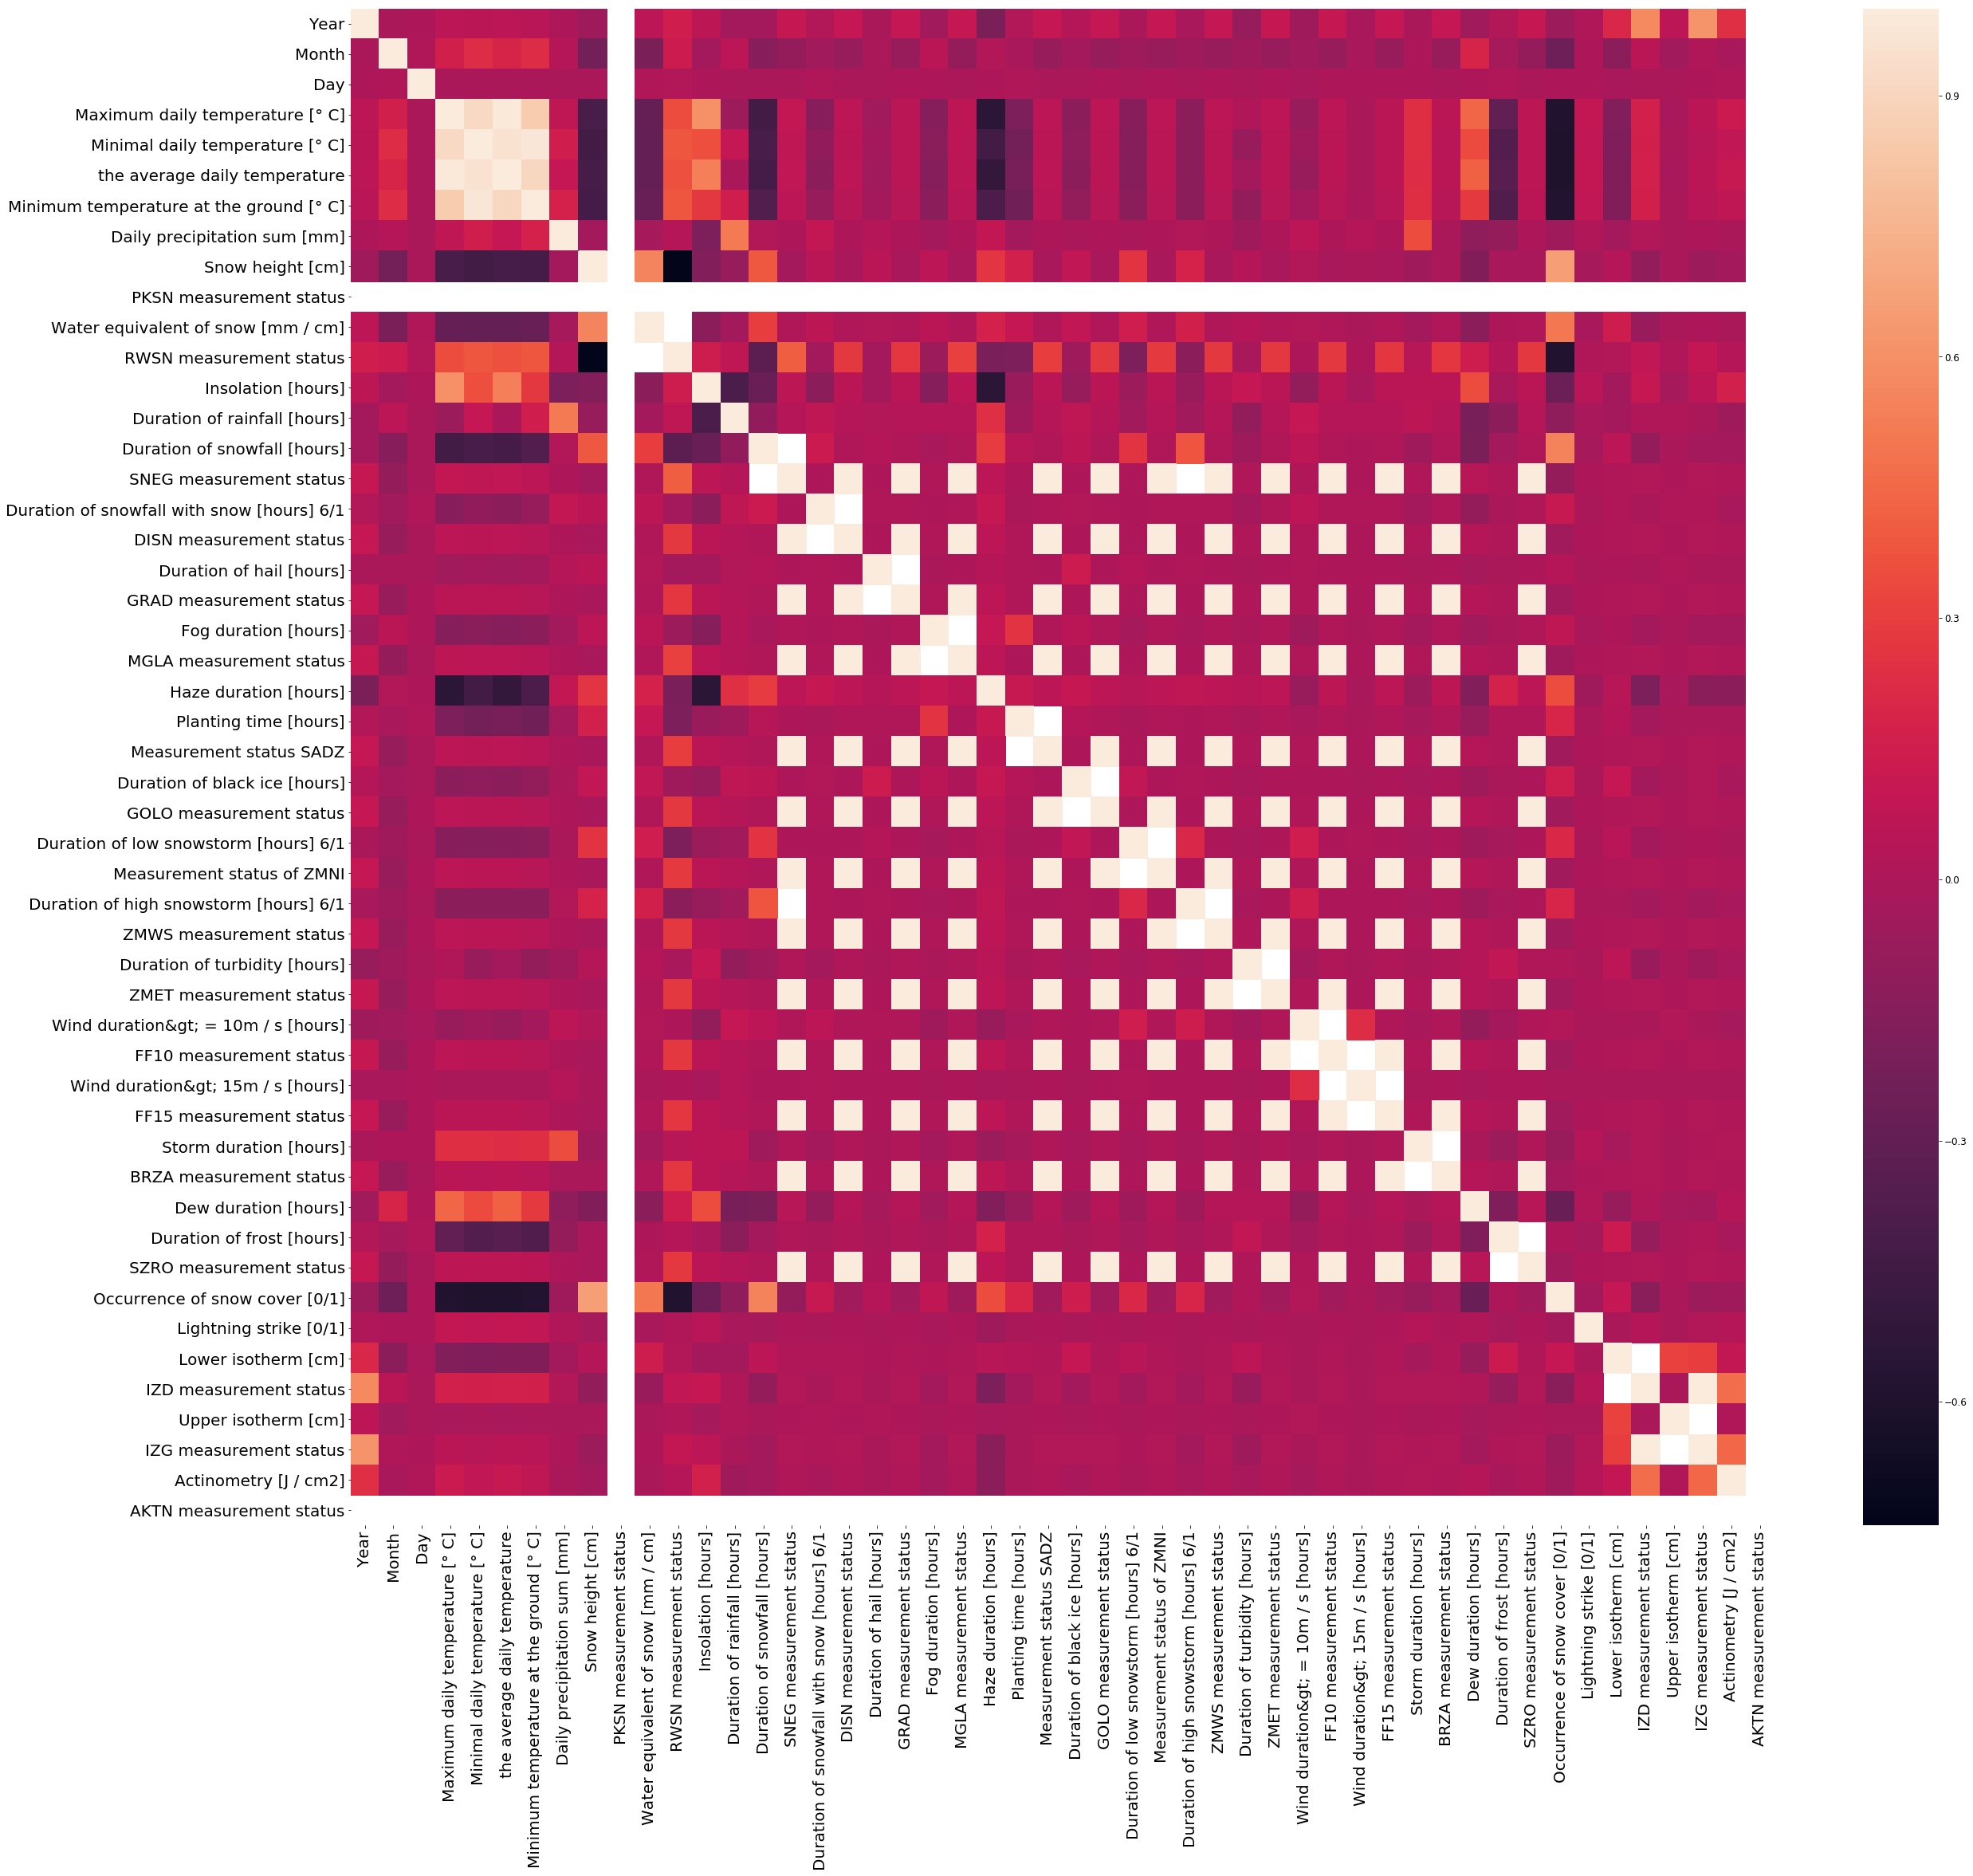

In [177]:
corr = sd.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
heat_map=plt.gcf()
heat_map.set_size_inches(40,35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Minimum/maximum daily temperature and min. temperature of the ground have been excluded due to multicorrelativity.
Based on the heatmap, the following columns have been selected for the analysis:

In [178]:
colsToKeep = ['Year', 'Month', 'Day', 'the average daily temperature', 'Snow height [cm]', 'Insolation [hours]', 
              'Duration of rainfall [hours]', 'Duration of snowfall [hours]', 'Haze duration [hours]',
              'Storm duration [hours]', 'Dew duration [hours]', 'Duration of frost [hours]', 'Occurrence of snow cover [0/1]']

In [179]:
sd = sd[colsToKeep]

In [180]:
newNames = ['Year', 'Month', 'Day', 'tempAvgK', 'snowHeightCm', 'insolationH', 'rainDurH', 'snowDurH', 'hazeDurH', 
            'stormDurH', 'dewDurH', 'frostDurH', 'isSnow']
sd.columns = newNames

Some columns are not filled properly. Let's take a look:

In [181]:
sd.isnull().sum()

Year            1
Month           1
Day             1
tempAvgK        1
snowHeightCm    1
insolationH     1
rainDurH        1
snowDurH        1
hazeDurH        1
stormDurH       1
dewDurH         1
frostDurH       1
isSnow          1
dtype: int64

Since there is always one value empty, the last record will be checked in order to established if it is not filled with Nan's:

In [182]:
sd.tail(1)

,Year,Month,Day,tempAvgK,snowHeightCm,insolationH,rainDurH,snowDurH,hazeDurH,stormDurH,dewDurH,frostDurH,isSnow
19419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
sd.drop(sd.index[19419], inplace=True)

In [184]:
sd.isnull().sum()

Year            0
Month           0
Day             0
tempAvgK        0
snowHeightCm    0
insolationH     0
rainDurH        0
snowDurH        0
hazeDurH        0
stormDurH       0
dewDurH         0
frostDurH       0
isSnow          0
dtype: int64

Converting values to integers:

In order to avoid the problems with dividing by 0 later on, the values will be converted to Kelvin

In [185]:
sd['tempAvgK'] = sd['tempAvgK']+273.15

In [186]:
sd.head()

,Year,Month,Day,tempAvgK,snowHeightCm,insolationH,rainDurH,snowDurH,hazeDurH,stormDurH,dewDurH,frostDurH,isSnow
0,1965.0,11.0,1.0,280.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1965.0,11.0,2.0,282.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1965.0,11.0,3.0,278.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1965.0,11.0,4.0,276.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1965.0,11.0,5.0,274.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
sd.count()

Year            19419
Month           19419
Day             19419
tempAvgK        19419
snowHeightCm    19419
insolationH     19419
rainDurH        19419
snowDurH        19419
hazeDurH        19419
stormDurH       19419
dewDurH         19419
frostDurH       19419
isSnow          19419
dtype: int64

In [187]:
sdTwoFive = sd.where(sd['Year'] > 1993).dropna()

In [235]:
sdTwoFive.count()

Year            9131
Month           9131
Day             9131
tempAvgK        9131
snowHeightCm    9131
insolationH     9131
rainDurH        9131
snowDurH        9131
hazeDurH        9131
stormDurH       9131
dewDurH         9131
frostDurH       9131
isSnow          9131
dtype: int64

In [209]:
sdYear = sd.where(sd['Year'] > 2017).dropna()

In [236]:
sdYear.count()

Year            365
Month           365
Day             365
tempAvgK        365
snowHeightCm    365
insolationH     365
rainDurH        365
snowDurH        365
hazeDurH        365
stormDurH       365
dewDurH         365
frostDurH       365
isSnow          365
dtype: int64

## 3. Random Forest Regressor

The values can be splitted into train and test sets with size 75:25.

In [189]:
y_all = np.array(sd['tempAvgK'])
x_all = sd.drop(['tempAvgK'], axis=1)
x_list = list(x_all.columns)
x_all = np.array(x_all)

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size = 0.25, random_state = 42)

Training the regressor with 50 estimators.

In [191]:
reg = RandomForestRegressor(n_estimators = 50, random_state = 42)
reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Reapeating for the two next models:

In [192]:
y_tf_all = np.array(sdTwoFive['tempAvgK'])
x_tf_all = sdTwoFive.drop(['tempAvgK'], axis=1)
x_tf_list = list(x_tf_all.columns)
x_tf_all = np.array(x_tf_all)
x_tf_train, x_tf_test, y_tf_train, y_tf_test = train_test_split(x_tf_all, y_tf_all, test_size = 0.25, random_state = 42)
reg_tf = RandomForestRegressor(n_estimators = 50, random_state = 42)
reg_tf.fit(x_tf_train, y_tf_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [210]:
y_year_all = np.array(sdYear['tempAvgK'])
x_year_all = sdYear.drop(['tempAvgK'], axis=1)
x_year_list = list(x_year_all.columns)
x_year_all = np.array(x_year_all)
x_year_train, x_year_test, y_year_train, y_year_test = train_test_split(x_year_all, y_year_all, test_size = 0.25, random_state = 42)
reg_year = RandomForestRegressor(n_estimators = 50, random_state = 42)
reg_year.fit(x_year_train, y_year_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

## 4. Results

Evaluating the models performance looks as follows:

### 53 years sample:

In [223]:
predictions = reg.predict(x_test)
errors = round(mean_absolute_error(y_test, predictions), 2)
print('Mean absolute error: ', errors, ' Kelvins.')

Mean absolute error:  2.17  Kelvins.


...which calculates to 99.23% percent of accurancy. 

In [195]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.23 %.


It is a good score, however, let's check where the algorithm could do better.

In [224]:
sdCompare = pd.DataFrame()

In [225]:
sdCompare['actual'] = y_test
sdCompare['forecast'] = predictions
sdCompare['error'] = abs(y_test - predictions)

The highest error is 14.1 degrees.

In [226]:
sdCompare[sdCompare['error'] == sdCompare['error'].max()]

,actual,forecast,error
1340,248.95,263.05,14.1


In [227]:
print('Highest error: ', round(sdCompare['error'].max(),2))

Highest error:  14.1


### 25 years sample:

In [199]:
predictions_tf = reg_tf.predict(x_tf_test)
errors_tf = round(mean_absolute_error(y_tf_test, predictions_tf), 2)
print('Mean absolute error: ', error_tf, ' Kelvins.')

Mean absolute error:  2.24  Kelvins.


In [200]:
mape_tf = 100 * (errors_tf / y_tf_test)
accuracy_tf = 100 - np.mean(mape_tf)
print('Accuracy:', round(accuracy_tf, 2), '%.')

Accuracy: 99.2 %.


In [232]:
sdTwoFiveCompare = pd.DataFrame()
sdTwoFiveCompare['actual'] = y_tf_test
sdTwoFiveCompare['forecast'] = predictions_tf
sdTwoFiveCompare['error'] = abs(y_tf_test - predictions_tf)
sdTwoFiveCompare[sdTwoFiveCompare['error'] == sdTwoFiveCompare['error'].max()]

,actual,forecast,error
1562,248.95,262.218,13.268


In [229]:
print('Highest error: ', round(sdTwoFiveCompare['error'].max(),2))

Highest error:  13.27


### 1 year sample:

In [211]:
predictions_year = reg_year.predict(x_year_test)
errors_year = round(mean_absolute_error(y_year_test, predictions_year), 2)
print('Mean absolute error: ', errors_year, ' Kelvins.')

Mean absolute error:  2.59  Kelvins.


In [212]:
mape_year = 100 * (errors_year / y_year_test)
accuracy_year = 100 - np.mean(mape_year)
print('Accuracy:', round(accuracy_year, 2), '%.')

Accuracy: 99.07 %.


In [231]:
sdYearCompare = pd.DataFrame()
sdYearCompare['actual'] = y_year_test
sdYearCompare['forecast'] = predictions_year
sdYearCompare['error'] = abs(y_year_test - predictions_year)
sdYearCompare[sdYearCompare['error'] == sdYearCompare['error'].max()]

,actual,forecast,error
13,262.15,274.71,12.56


In [233]:
print('Highest error: ', round(sdYearCompare['error'].max(),2))

Highest error:  12.56


### Feature analysis

The above results do not vary much - the accuracy and the highest errors noted are both similar for all three dataframes. The length of the series do not influence the results in a drastic way.

Another possibility to be considered is the importance of features included in the database. 

For the further analysis I am going to use the largest dataframe - **sd** (containing 19419 records).

Currently, the most important features used by the model with **99.23%** accuracy look as follows:

In [242]:
sd_f = pd.DataFrame()
sd_f['impact'] = reg.feature_importances_
sd_f['features'] = x_list
sd_f.sort_values('impact', inplace=True, ascending=False)
sd_f.head()

,impact,features
11,0.305934,isSnow
1,0.302864,Month
4,0.099017,insolationH
10,0.084798,frostDurH
3,0.063711,snowHeightCm


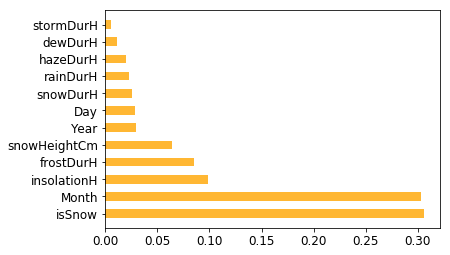

In [147]:
index = np.arange(len(reg.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , sd_f['impact'], bar_width, alpha=0.8, color='orange', label='Main')
plt.yticks(index, sd_f['features'])
plt.show()

Next, I am going to repeat the process of model creation for the dataset of the same length, however, without some of the columns used in the previous analaysis.

In [259]:
x_all_a = sd.drop(['Month', 'tempAvgK', 'isSnow', 'insolationH', 'frostDurH', 'snowDurH'], axis=1)
x_list_a = list(x_all_a.columns)
x_all_a = np.array(x_all_a)
x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_all_a, y_all, test_size = 0.25, random_state = 42)
reg_a = RandomForestRegressor(n_estimators = 50, random_state = 42)
reg_a.fit(x_a_train, y_a_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [260]:
predictions_a = reg_a.predict(x_a_test)
errors_a = round(mean_absolute_error(y_a_test, predictions_a), 2)
print('Mean absolute error: ', errors_a, ' Kelvins.')

Mean absolute error:  4.03  Kelvins.


In [261]:
mape_a = 100 * (errors_a / y_a_test)
accuracy_a = 100 - np.mean(mape_a)
print('Accuracy:', round(accuracy_a, 2), '%.')

Accuracy: 98.57 %.


The accuracy has dropped significantly in comparison to the previous models with lesser row count and different features.

The top 5 features of the newly generated model look as follows:

In [262]:
sd_f_a = pd.DataFrame()
sd_f_a['impact'] = reg_a.feature_importances_
sd_f_a['features'] = x_list_a
sd_f_a.sort_values('impact', inplace=True, ascending=False)
sd_f_a.head()

,impact,features
2,0.376196,snowHeightCm
4,0.144770,hazeDurH
6,0.135183,dewDurH
0,0.119088,Year
1,0.101631,Day


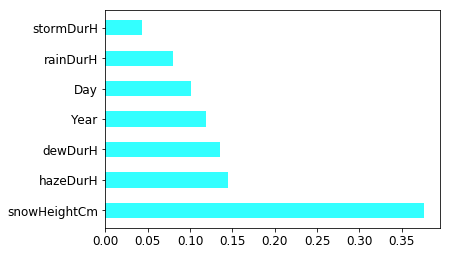

In [263]:
index = np.arange(len(reg_a.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , sd_f_a['impact'], bar_width, alpha=0.8, color='cyan', label='Main')
plt.yticks(index, sd_f_a['features'])
plt.show()

Finally, the results of the best performing model can be presented on the graph in order to detect if there are some noticable outliers. To create a graph comparing predictions and actual values, two databases with two columns will be created - both will contain dates created by datetime module and respective sets of values. 

First, I am going to convert the values back to Celcius for viewing convenience:

In [130]:
predictions = predictions - 273.15

In [140]:
y_all = y_all - 273.15

Dataset containing actual values...

In [141]:
years = x_all[:, x_list.index('Year')]
months = x_all[:, x_list.index('Month')]
days = x_all[:, x_list.index('Day')]

actualDates = []

for i in range(len(years)):
    date = datetime.datetime.strptime(str(int(years[i]))+'-'+str(int(months[i]))+'-'+str(int(days[i])), '%Y-%m-%d')
    actualDates.append(date)

In [142]:
actualTemp = pd.DataFrame()
actualTemp['date'] = actualDates
actualTemp['actual'] = y_all

In [148]:
actualTemp.head(10)

,date,actual
0,1965-11-01,7.6
1,1965-11-02,9.5
2,1965-11-03,5.8
3,1965-11-04,3.4
4,1965-11-05,1.4
5,1965-11-06,3.0
6,1965-11-07,4.7
7,1965-11-08,2.4
8,1965-11-09,1.8
9,1965-11-10,4.1


Dataset containing predicted values...

In [143]:
years = x_test[:, x_list.index('Year')]
months = x_test[:, x_list.index('Month')]
days = x_test[:, x_list.index('Day')]

testDates = []

for i in range(len(years)):
    date = datetime.datetime.strptime(str(int(years[i]))+'-'+str(int(months[i]))+'-'+str(int(days[i])), '%Y-%m-%d')
    testDates.append(date)

In [151]:
testTemp = pd.DataFrame()
testTemp['date'] = testDates
testTemp['predictions'] = y_test

In [152]:
testTemp.head(10)

,date,predictions
0,2003-11-14,-1.0
1,1997-03-24,-0.9
2,1968-03-28,10.3
3,1986-02-18,-6.8
4,1973-10-19,4.9
5,2008-02-23,6.4
6,1980-02-07,-0.8
7,2009-09-15,16.8
8,1980-10-06,9.4
9,1979-03-18,-2.6


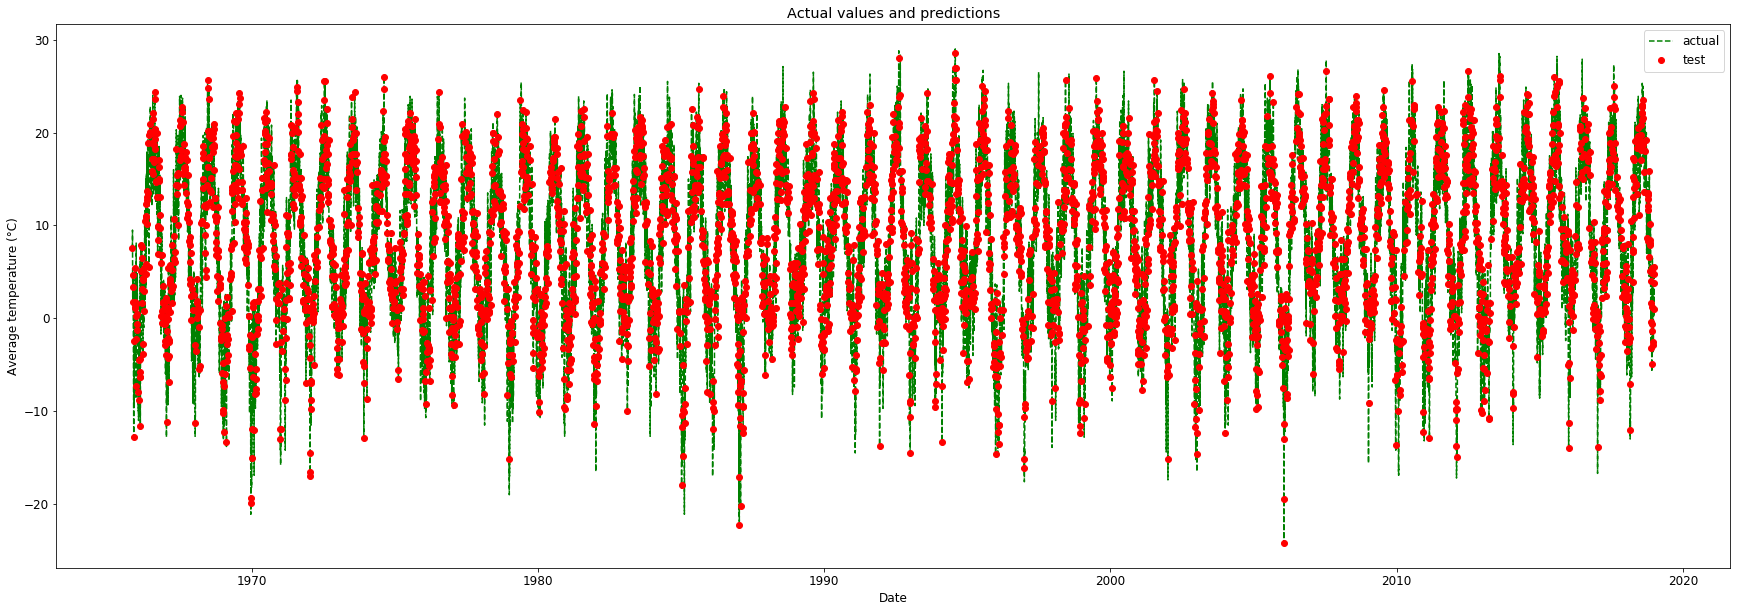

In [246]:
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 12})
plt.plot(actualTemp['date'], actualTemp['actual'], 'g--', label = 'actual')
plt.plot(testTemp['date'], testTemp['predictions'], 'ro', label = 'test')

plt.xlabel('Date') 
plt.ylabel('Average temperature (°C)')
plt.title('Actual values and predictions')
plt.legend()

The presented model has accomplished the task with satisfactionary results. The above graph shows that there are no noticable outliers.

## 5. Conclusions

The final results look as follows:

In [276]:
results = pd.DataFrame()
results['dataset used'] = ['53 years', '25 years', '1 year', '65 years - minus features']
results['length'] = [len(sd), len(sdTwoFive), len(sdYear), len(sd)]
results['number of features'] = [len(x_list), len(x_tf_list), len(x_year_list), len(x_list_a)]
results['accuracy'] = [round(accuracy, 2), round(accuracy_tf, 2), round(accuracy_year, 2), round(accuracy_a, 2)]
results

,dataset used,length,number of features,accuracy
0,53 years,19419,12,99.23
1,25 years,9131,12,99.20
2,1 year,365,12,99.07
3,65 years - minus features,19419,7,98.57


The aim of the project was to 'forecast' weather in order to present differences in Random Forest Regressor performance by training it to similar datasets, albeit with different length and features. From the analysis it can be concluded that the number and correlativity of features included in the dataset have more importance than samples count.